In [ ]:
import pandas as pd                     
import matplotlib.pyplot as plt          
import numpy as np                       
from scipy.sparse import csr_matrix      
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Wiki-Vote.txt')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import networkx as nx


value = nx.read_edgelist('/content/drive/MyDrive/Wiki-Vote.txt', nodetype=int)


Graph = nx.DiGraph()
Graph.add_edges_from(value.edges())


In [ ]:
# Page Rank
scores_page_rank = nx.pagerank(Graph, alpha=0.85)


In [ ]:
# Sorting
sorted_nodes = sorted(scores_page_rank, key=scores_page_rank.get, reverse=True)

# Print Scores
for node in sorted_nodes:
    print(f"Node {node}: PageRank score = {scores_page_rank[node]}")


Streaming output truncated to the last 5000 lines.
Node 7371: PageRank score = 0.00012290683500522525
Node 3877: PageRank score = 0.00012290647682664348
Node 5815: PageRank score = 0.00012285829469370804
Node 5788: PageRank score = 0.000122850931664286
Node 4764: PageRank score = 0.00012279284060008367
Node 4603: PageRank score = 0.00012278267288957253
Node 5072: PageRank score = 0.00012277759730726435
Node 5415: PageRank score = 0.00012277288504264531
Node 5437: PageRank score = 0.00012273210117171824
Node 2085: PageRank score = 0.00012268227178798005
Node 1984: PageRank score = 0.00012267230162107872
Node 4934: PageRank score = 0.00012266909590444183
Node 1991: PageRank score = 0.00012266889930222864
Node 2676: PageRank score = 0.0001226383784532372
Node 2607: PageRank score = 0.00012263550847553856
Node 2073: PageRank score = 0.00012263082809199437
Node 5339: PageRank score = 0.00012261806928479796
Node 3488: PageRank score = 0.00012260842550209234
Node 3849: PageRank score = 0.0001

Authority and Hub score for each node

In [ ]:
import networkx as nx


values = nx.read_edgelist('/content/drive/MyDrive/Wiki-Vote.txt', nodetype=int)


In [ ]:
# hits score
hits_authority, hits_hub = nx.hits(values, max_iter=100, tol=1e-06, normalized=True)


In [ ]:
# Print scores
sorted_authority = sorted(hits_authority, key=hits_authority.get, reverse=True)
sorted_hub = sorted(hits_hub, key=hits_hub.get, reverse=True)
for node in sorted_authority:
    print(f"Node {node}: Authority score = {hits_authority[node]}, Hub score = {hits_hub[node]}")


Streaming output truncated to the last 5000 lines.
Node 5150: Authority score = 9.664035850445919e-05, Hub score = 9.664035850445919e-05
Node 6567: Authority score = 9.663918833771178e-05, Hub score = 9.663918833771178e-05
Node 3977: Authority score = 9.656187636204032e-05, Hub score = 9.656187636204036e-05
Node 1569: Authority score = 9.649275673540667e-05, Hub score = 9.64927567354067e-05
Node 5326: Authority score = 9.642282873947764e-05, Hub score = 9.642282873947767e-05
Node 4746: Authority score = 9.632349688916175e-05, Hub score = 9.632349688916151e-05
Node 2552: Authority score = 9.625905816010291e-05, Hub score = 9.625905816010286e-05
Node 6316: Authority score = 9.624027896849968e-05, Hub score = 9.624027896849953e-05
Node 192: Authority score = 9.616792309784042e-05, Hub score = 9.616792309784045e-05
Node 1861: Authority score = 9.616564115936872e-05, Hub score = 9.616564115936876e-05
Node 4934: Authority score = 9.614564434437708e-05, Hub score = 9.614564434437715e-05
Node 

Histogram for all values

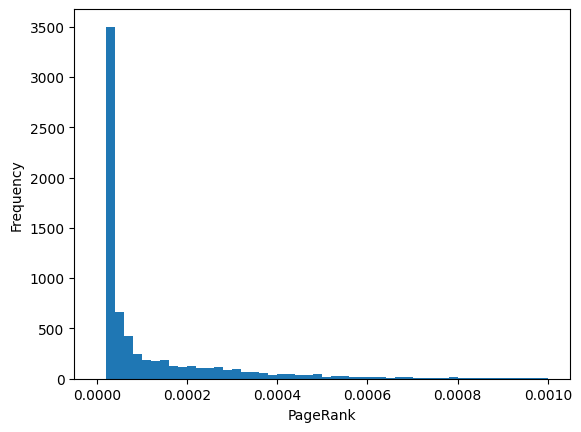

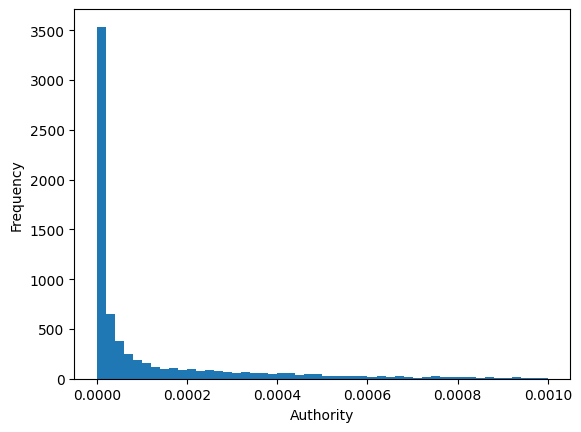

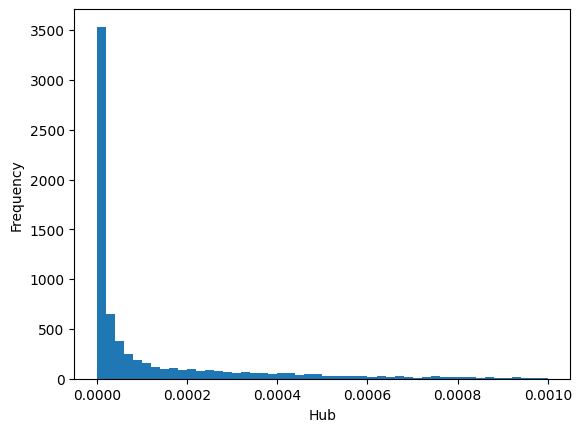

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.read_edgelist('/content/drive/MyDrive/Wiki-Vote.txt')

# PageRank
pr_scores = nx.pagerank(G)

# Authority and Hub
ah_scores = nx.hits(G)

# list of nodes
nodes = list(G.nodes())
pr_values = [pr_scores[node] for node in nodes]
ah_authority_values = [ah_scores[0][node] for node in nodes]
ah_hub_values = [ah_scores[1][node] for node in nodes]

# histogram PageRank
fig, ax = plt.subplots()
ax.hist(pr_values, bins=50, range=(0, 0.001))
ax.set_xlabel('PageRank')
ax.set_ylabel('Frequency')
plt.show()

# Histogram Authority
fig, ax = plt.subplots()
ax.hist(ah_authority_values, bins=50, range=(0, 0.001))
ax.set_xlabel('Authority')
ax.set_ylabel('Frequency')
plt.show()

# Histogram Hub
fig, ax = plt.subplots()
ax.hist(ah_hub_values, bins=50, range=(0, 0.001))
ax.set_xlabel('Hub')
ax.set_ylabel('Frequency')
plt.show()



0.00014054813773717488
0.00014054813773717483
0.00014054813773717488


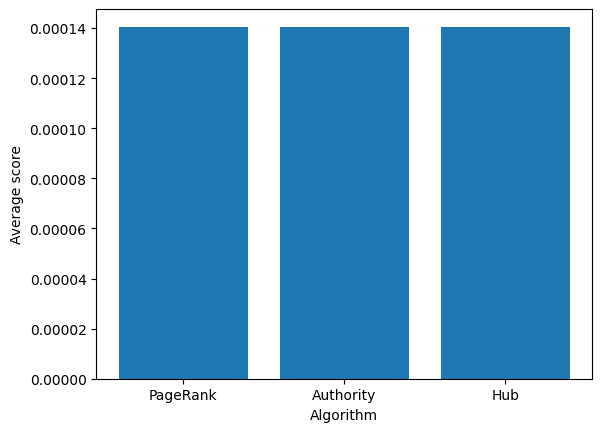

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.read_edgelist('/content/drive/MyDrive/Wiki-Vote.txt')

#page rank
pr_scores = nx.pagerank(G)

# Calculate Authority and Hub score for each node
ah_scores = nx.hits(G)

# hits score
nodes = list(G.nodes())
pr_values = [pr_scores[node] for node in nodes]
ah_authority_values = [ah_scores[0][node] for node in nodes]
ah_hub_values = [ah_scores[1][node] for node in nodes]

# average 
avg_pr_score = sum(pr_values) / len(pr_values)
print(avg_pr_score)
avg_ah_authority_score = sum(ah_authority_values) / len(ah_authority_values)
print(avg_ah_authority_score)
avg_ah_hub_score = sum(ah_hub_values) / len(ah_hub_values)
print(avg_ah_hub_score)

# Plot graph
fig, ax = plt.subplots()
ax.bar(['PageRank', 'Authority', 'Hub'], [avg_pr_score, avg_ah_authority_score, avg_ah_hub_score])
ax.set_xlabel('Algorithm')
ax.set_ylabel('Average score')
plt.show()
